In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [39]:
def display_image(img):
    plt.imshow(img,cmap="gray")
    plt.show()

In [40]:
def gaussian_blur(img):
    blurred_img = cv2.GaussianBlur(img,(5,5),0)
    return blurred_img

In [41]:
def angle_approx(angle_in_rad):
    angle_in_deg = np.rad2deg(angle_in_rad) % 180
    if (0 <= angle_in_deg < 22.5) or (157.5 <= angle_in_deg < 180):
        angle_in_deg = 0
    elif (22.5 <= angle_in_deg < 67.5):
        angle_in_deg = 45
    elif (67.5 <= angle_in_deg < 112.5):
        angle_in_deg = 90
    elif (112.5 <= angle_in_deg < 157.5):
        angle_in_deg = 135
    return angle_in_deg

In [42]:
def intensity_gradient(img):
    grad_x = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    grad_y = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    grad_mag = np.hypot(grad_x, grad_y)
    grad_dir = np.arctan2(grad_y,grad_x)
    return (grad_mag,grad_dir)

In [43]:
def non_max_suppression(grad_mag,grad_dir):
    rows,cols = grad_dir.shape
    res_img = np.zeros((rows,cols))
    for i in range(rows):
        for j in range(cols):
            round_grad_dir = angle_approx(grad_dir[i,j])
            if(round_grad_dir==0):
                if (j!=cols-1 and j!=0) and (img[i,j]>=img[i,j-1]) and (img[i,j]>=img[i,j+1]):
                    res_img[i,j]=img[i,j]
            elif (round_grad_dir==90):
                if (i!=rows-1 and i!=0) and (img[i,j]>=img[i-1,j]) and (img[i,j]>=img[i+1,j]):
                    res_img[i,j]=img[i,j]
            elif(round_grad_dir==45):
                if (i!=rows-1 and i!=0) and (j!=cols-1 and j!=0) and (img[i,j]>=img[i-1,j+1]) and (img[i,j]>=img[i+1,j-1]):
                    res_img[i,j]=img[i,j]
            elif(round_grad_dir==135):
                if (i!=rows-1 and i!=0) and (j!=cols-1 and j!=0) and (img[i,j] >= img[i-1,j-1]) and (img[i,j] >= img[i+1,j+1]):
                        res_img[i,j] = img[i,j]
    return res_img

In [44]:
def hysterisis_thresholding(grad_mag, min_val, max_val):
    strong_i,strong_j = np.where(grad_mag>max_val)
    weak_i,weak_j = np.where((grad_mag>=min_val) & (grad_mag<=max_val))
    zero_i,zero_j = np.where(grad_mag<min_val)
    
    grad_mag[strong_i,strong_j]=np.int32(255)
    grad_mag[weak_i,weak_j]=np.int32(128)
    grad_mag[zero_i,zero_j]=np.int32(0)
    
    rows,cols = grad_mag.shape
    for i in range(rows):
        for j in range(cols):
            if(grad_mag[i,j]==128):
                if((i!=rows-1 and grad_mag[i+1,j]==255) or (i!=0 and grad_mag[i-1,j]==255)
                   or (j!=cols-1 and grad_mag[i,j+1]==255) or (j!=0 and grad_mag[i,j-1]==255)
                   or (i!=rows-1 and j!=0 and grad_mag[i+1,j-1]==255) 
                   or (i!=0 and j!=cols-1 and grad_mag[i-1,j+1]==255)):
                    grad_mag[i,j]=255
                else:
                    grad_mag[i,j]=0
    return grad_mag

In [69]:
def canny_edge_detector(img,t,T):
    img = gaussian_blur(img)
    grad_mag,grad_dir =  intensity_gradient(img)
    grad_mag = non_max_suppression(grad_mag,grad_dir)
    edges = hysterisis_thresholding(grad_mag,t,T)
    return edges

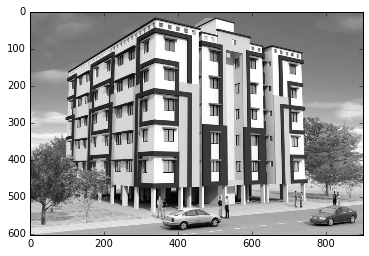

In [70]:
img = cv2.imread('building.jpg',0)
display_image(img)

In [71]:
edges = canny_edge_detector(img,150,200)

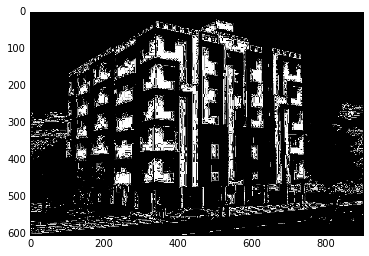

In [72]:
display_image(edges)